# Homework 3
- 2020151035 이동규

In [ ]:
import wandb
wandb.api.viewer()

In [1]:
!pip install wandb
!pip install torchinfo
import wandb
wandb.login()

/usr/local/lib/python3.12/dist-packages/notebook/notebookapp.py:191: SyntaxWarning: invalid escape sequence '\/'
  | |_| | '_ \/ _` / _` |  _/ -_)
wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: stvboy00 (stvboy00-korea-university-of-technology-and-education) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


True

# 문제 1
- 아래 셀의 출력 결과로 fashion mnist data와 fashion mnist test data의 평균, 분산 값을 구하였다.
- `fashion_mnist_train_data.py`에 계산 결과가 적용된 데이터 반환 함수가 구현되어 있다.

In [ ]:
# train data의 mean, std와 test data의 mean, std를 구하기 위한 python 코드 실행
%run fashion_mnist_train_data_1.py

/
Num Train Samples:  55000
Num Validation Samples:  5000
Sample Data Shape:  torch.Size([1, 28, 28])
Sample Data Target:  8
Number of Data Loading Workers: 2

Calculating mean and std for normalization...
Calculated Mean: 0.28600025177001953
Calculated Std: 0.3530220687389374

Num Test Samples:  10000
Sample Shape:  torch.Size([1, 28, 28])
Calculated Mean: 0.2868492603302002
Calculated Std: 0.3524441719055176


# 문제 2
- 위에서 구한 mean과 std 값을 적용 (`fashion_mnist_train_data.py`)

## no normalization

In [2]:
%run fashion_mnist_train_cnn_with_norm.py --wandb -b 1024 -v 1 -o 3 -w 0.001 --dropout -n 0

/content
/content/checkpoint
/


Namespace(wandb=True, batch_size=1024, epochs=50, learning_rate=0.001, validation_intervals=1, early_stop_patience=10, early_stop_delta=1e-05, optimizer=3, weight_decay=0.001, dropout=True, normalization=0, augment=False)
{'epochs': 50, 'batch_size': 1024, 'validation_intervals': 1, 'learning_rate': 0.001, 'early_stop_patience': 10, 'early_stop_delta': 1e-05, 'weight_decay': 0.001, 'dropout': True, 'normalization': 0}
Training on device cuda:0.


100%|██████████| 26.4M/26.4M [00:00<00:00, 114MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 3.75MB/s]
100%|██████████| 4.42M/4.42M [00:00<00:00, 57.0MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 9.56MB/s]


Num Train Samples:  55000
Num Validation Samples:  5000
Sample Data Shape:  torch.Size([1, 28, 28])
Sample Data Target:  5
Number of Data Loading Workers: 2
Model Structure (Normalization: 0)
Layer (type:depth-idx)                   Input Shape               Output Shape              Param #                   Mult-Adds
MyModel                                  [1024, 1, 28, 28]         [1024, 10]                --                        --
├─Sequential: 1-1                        [1024, 1, 28, 28]         [1024, 10]                --                        --
│    └─Conv2d: 2-1                       [1024, 1, 28, 28]         [1024, 16, 28, 28]        160                       128,450,560
│    └─BatchNorm2d: 2-2                  [1024, 16, 28, 28]        [1024, 16, 28, 28]        32                        32,768
│    └─ReLU: 2-3                         [1024, 16, 28, 28]        [1024, 16, 28, 28]        --                        --
│    └─Conv2d: 2-4                       [1024, 16, 28, 

Epoch,▁▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇▇███
Training accuracy (%),▁▃▄▄▅▅▆▆▆▆▆▆▇▇▇▇▇▇▇▇▇▇▇▇██▇█████████████
Training loss,█▄▃▃▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
Training speed (epochs/sec.),▁▇▇▇▇███████████▇█▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▆▆▆▆▆▆
Validation accuracy (%),▁▄▅▅▆▆▇▇▇▇▇▇▇▇▇█▇████▇▇█████████████████
Validation loss,█▅▄▄▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▂▁▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
Epoch,50
Training accuracy (%),92.81818
Training loss,0.19546
Training speed (epochs/sec.),0.14085
Validation accuracy (%),93.2


## batch normalization

### 내가 선택한 최적의 하이퍼 파라미터
- batch_size=1024
- epochs=50
- learning_rate=0.001
- validation_intervals=1
- early_stop_patience=6
- early_stop_delta=1e-0
- optimizer = Adam
- weight_decay=0.001
- dropout=True
- normalization=Batch norm
- augment=False

In [3]:
%run fashion_mnist_train_cnn_with_norm.py --wandb -b 1024 -v 1 -o 3 -w 0.001 --dropout -n 1

/content
/content/checkpoint


Namespace(wandb=True, batch_size=1024, epochs=50, learning_rate=0.001, validation_intervals=1, early_stop_patience=10, early_stop_delta=1e-05, optimizer=3, weight_decay=0.001, dropout=True, normalization=1, augment=False)
{'epochs': 50, 'batch_size': 1024, 'validation_intervals': 1, 'learning_rate': 0.001, 'early_stop_patience': 10, 'early_stop_delta': 1e-05, 'weight_decay': 0.001, 'dropout': True, 'normalization': 1}
Training on device cuda:0.
Num Train Samples:  55000
Num Validation Samples:  5000
Sample Data Shape:  torch.Size([1, 28, 28])
Sample Data Target:  7
Number of Data Loading Workers: 2
Model Structure (Normalization: 1)
Layer (type:depth-idx)                   Input Shape               Output Shape              Param #                   Mult-Adds
MyModel                                  [1024, 1, 28, 28]         [1024, 10]                --                        --
├─Sequential: 1-1                        [1024, 1, 28, 28]         [1024, 10]                --             

Epoch,▁▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
Training accuracy (%),▁▅▆▆▆▆▇▇▇▇▇▇▇▇▇▇█▇▇█████████████████████
Training loss,█▄▃▃▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
Training speed (epochs/sec.),▄█▇█▁▃▃▄▄▄▄▄▄▃▄▄▄▄▅▅▅▄▄▄▅▅▅▅▅▅▅▅▅▅▅▆▅▆▆▆
Validation accuracy (%),▁▄▅▆▆▆▇▆▇▇▇▇▇▇▇▇█▇▇▇██████████▇█████████
Validation loss,█▅▄▃▃▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
Epoch,50
Training accuracy (%),93.88545
Training loss,0.17661
Training speed (epochs/sec.),0.12887
Validation accuracy (%),94.02


## Layer normalization

In [ ]:
%run fashion_mnist_train_cnn_with_norm.py --wandb -b 1024 -v 1 -o 3 -w 0.001 --dropout -n 2

/content
/content/checkpoint
/


wandb: Currently logged in as: stvboy00 (stvboy00-korea-university-of-technology-and-education) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Namespace(wandb=True, batch_size=1024, epochs=50, learning_rate=0.001, validation_intervals=1, early_stop_patience=6, early_stop_delta=1e-05, optimizer=3, weight_decay=0.001, dropout=True, normalization=2, augment=False)
{'epochs': 50, 'batch_size': 1024, 'validation_intervals': 1, 'learning_rate': 0.001, 'early_stop_patience': 6, 'early_stop_delta': 1e-05, 'weight_decay': 0.001, 'dropout': True, 'normalization': 2}
Training on device cuda:0.
Num Train Samples:  55000
Num Validation Samples:  5000
Sample Data Shape:  torch.Size([1, 28, 28])
Sample Data Target:  3
Number of Data Loading Workers: 2
Model Structure (Normalization: 2)
Layer (type:depth-idx)                   Input Shape               Output Shape              Param #                   Mult-Adds
MyModel                                  [1024, 1, 28, 28]         [1024, 10]                --                        --
├─Sequential: 1-1                        [1024, 1, 28, 28]         [1024, 10]                --               

Epoch,▁▁▂▂▂▃▃▃▃▄▄▄▅▅▅▆▆▆▆▇▇▇██
Training accuracy (%),▁▆▆▇▇▇▇▇▇▇▇█████████████
Training loss,█▃▃▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
Training speed (epochs/sec.),██▂▄▁▂▃▄▄▃▅▄▄▄▄▅▅▅▅▅▅▆▅▅
Validation accuracy (%),▁▄▅▆▆▆▆▇▇▇▇▇██▇█▇██████▇
Validation loss,█▅▄▃▃▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁
Epoch,24
Training accuracy (%),91.43455
Training loss,0.2475
Training speed (epochs/sec.),0.13953
Validation accuracy (%),92.56


# 문제 3
- Test Accuracy : 93.4900%

## 모델 (batch normalization 셀의 모델과 동일)
- batch_size=1024
- epochs=50
- learning_rate=0.001
- validation_intervals=1
- early_stop_patience=6
- early_stop_delta=1e-0
- optimizer = Adam
- weight_decay=0.001
- dropout=True
- normalization=Batch norm
- augment=False

In [4]:
!python fashion_mnist_test.py -n 1 -c cnn_fashion_mnist_with_normalization_checkpoint_2025-11-18_09-51-02.pt

Base Path: /content
/
/content
/content/checkpoint
Using device: cuda:0
Num Test Samples:  10000
Sample Shape:  torch.Size([1, 28, 28])
Loaded 10000 test samples.
Instantiated model structure with: Batch Normalization
Successfully loaded trained weights from: cnn_fashion_mnist_with_normalization_checkpoint_2025-11-18_09-51-02.pt

  Model: Batch Normalization (cnn_fashion_mnist_with_normalization_checkpoint_2025-11-18_09-51-02.pt)
  Test Accuracy: 93.4900%


# 문제 4

Base Path: /content
Using device: cuda:0
Loading test data...
Num Test Samples:  10000
Sample Shape:  torch.Size([1, 28, 28])
Loading model structure with: Batch Normalization
Loading weights from /content/checkpoint/cnn_fashion_mnist_with_normalization_checkpoint_2025-11-18_09-51-02.pt...
Running predictions on 10 random images...


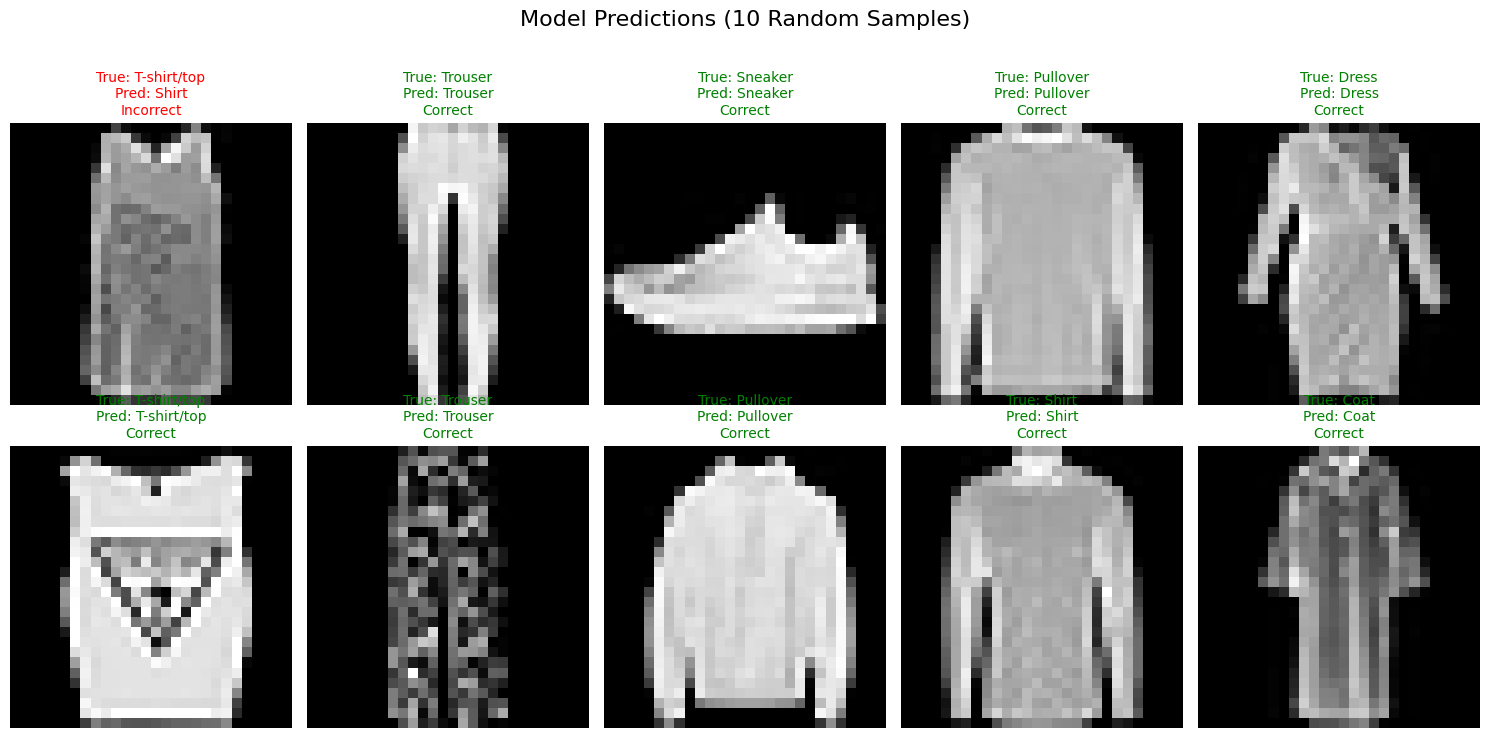

<Figure size 640x480 with 0 Axes>

In [8]:
%run predict_sample.py -n 1 -c /content/checkpoint/cnn_fashion_mnist_with_normalization_checkpoint_2025-11-18_09-51-02.pt

## 예측 결과가 틀린 이유 고찰
- 목이 라운드하게 파여있는 셔츠와 티셔츠의 공통 특성과, 형태의 유사성 때문에 햇갈렸을 것이라고 추측된다.

# Codes (실행 X)

## 데이터 불러오기
- `fashion_mnist_train_data` : mean값과 std값을 찾기 전 데이터 로더 코드
- `fashion_mnist_train_data_1` : 찾은 mean 값과 std 값을 적용한 데이터 로더 코드

In [ ]:
# fashion_mnist_train_data.py

import os
from pathlib import Path
import torch
import wandb
from torch import nn

from torch.utils.data import DataLoader, random_split
from torchvision import datasets
from torchvision.transforms import transforms

BASE_PATH = str(Path(os.getcwd()).resolve().parent) # BASE_PATH: /Users/stvbo/git/link_dl
print(BASE_PATH)

import sys

sys.path.append(BASE_PATH)

from utils import get_num_cpu_cores

def get_fashion_mnist_data():
    data_path = os.path.join(BASE_PATH, "_00_data", "j_fashion_mnist")

    f_mnist_train = datasets.FashionMNIST(data_path, train=True, download=True, transform=transforms.ToTensor())
    f_mnist_train, f_mnist_validation = random_split(f_mnist_train, [55_000, 5_000])

    print("Num Train Samples: ", len(f_mnist_train))
    print("Num Validation Samples: ", len(f_mnist_validation))
    print("Sample Data Shape: ", f_mnist_train[0][0].shape)  # torch.Size([1, 28, 28])
    print("Sample Data Target: ", f_mnist_train[0][1])  # 9

    num_data_loading_workers = get_num_cpu_cores()
    print("Number of Data Loading Workers:", num_data_loading_workers)

    train_data_loader = DataLoader(
        dataset=f_mnist_train, batch_size=wandb.config.batch_size, shuffle=True,
        pin_memory=True, num_workers=num_data_loading_workers
    )

    validation_data_loader = DataLoader(
        dataset=f_mnist_validation, batch_size=wandb.config.batch_size,
        pin_memory=True, num_workers=num_data_loading_workers
    )

    f_mnist_transforms = nn.Sequential(
        transforms.ConvertImageDtype(torch.float),
        transforms.Normalize(mean=0.28626272082328796, std=0.353203684091568),
    )

    return train_data_loader, validation_data_loader, f_mnist_transforms


def get_fashion_mnist_test_data():
    data_path = os.path.join(BASE_PATH, "_00_data", "j_fashion_mnist")

    f_mnist_test_images = datasets.FashionMNIST(data_path, train=False, download=True)
    f_mnist_test = datasets.FashionMNIST(data_path, train=False, download=True, transform=transforms.ToTensor())

    print("Num Test Samples: ", len(f_mnist_test))
    print("Sample Shape: ", f_mnist_test[0][0].shape)  # torch.Size([1, 28, 28])

    test_data_loader = DataLoader(dataset=f_mnist_test, batch_size=len(f_mnist_test))

    f_mnist_transforms = nn.Sequential(
        transforms.ConvertImageDtype(torch.float),
        transforms.Normalize(mean=0.2868492901325226, std=0.3524441719055176),
    )

    return f_mnist_test_images, test_data_loader, f_mnist_transforms


In [ ]:
# fashion_mnist_train_data_1.py

import os
from pathlib import Path
import torch
import wandb
from torch import nn

from torch.utils.data import DataLoader, random_split
from torchvision import datasets
from torchvision.transforms import transforms

BASE_PATH = str(Path(os.getcwd()).resolve().parent)
print(BASE_PATH)

import sys

sys.path.append(BASE_PATH)

from utils import get_num_cpu_cores

def find_fashion_mnist_data_mean_std():
    data_path = os.path.join(BASE_PATH, "_00_data", "j_fashion_mnist")

    f_mnist_train = datasets.FashionMNIST(data_path, train=True, download=True, transform=transforms.ToTensor())
    f_mnist_train, f_mnist_validation = random_split(f_mnist_train, [55_000, 5_000])

    print("Num Train Samples: ", len(f_mnist_train))
    print("Num Validation Samples: ", len(f_mnist_validation))
    print("Sample Data Shape: ", f_mnist_train[0][0].shape)  # torch.Size([1, 28, 28])
    print("Sample Data Target: ", f_mnist_train[0][1])  # 9

    num_data_loading_workers = get_num_cpu_cores()
    print("Number of Data Loading Workers:", num_data_loading_workers)

    print("\nCalculating mean and std for normalization...")

    # 55,000개의 f_mnist_train 데이터 전체를 로드할 DataLoader 생성
    # ToTensor()가 적용되어 0~1 사이 값으로 변환된 상태
    calculator_loader = DataLoader(
        dataset=f_mnist_train,
        batch_size=len(f_mnist_train),  # 모든 데이터를 하나의 배치로 로드
        shuffle=False
    )

    # DataLoader에서 데이터 배치 가져오기
    # data의 shape: [55000, 1, 28, 28]
    data = next(iter(calculator_loader))[0]

    # 전체 픽셀의 평균(mean)과 표준편차(std) 계산
    # data.mean() : 55000 * 1 * 28 * 28 개의 모든 픽셀 값의 평균
    # data.std()  : 55000 * 1 * 28 * 28 개의 모든 픽셀 값의 표준편차
    f_mnist_mean = data.mean().item()
    f_mnist_std = data.std().item()

    print(f"Calculated Mean: {f_mnist_mean}")
    print(f"Calculated Std: {f_mnist_std}")

def find_fashion_mnist_test_data_mean_std():
    data_path = os.path.join(BASE_PATH, "_00_data", "j_fashion_mnist")

    # f_mnist_test_images = datasets.FashionMNIST(data_path, train=False, download=True)
    f_mnist_test = datasets.FashionMNIST(data_path, train=False, download=True, transform=transforms.ToTensor())

    print("Num Test Samples: ", len(f_mnist_test))
    print("Sample Shape: ", f_mnist_test[0][0].shape)  # torch.Size([1, 28, 28])


    calculator_dataloader = DataLoader(dataset=f_mnist_test, batch_size=len(f_mnist_test), shuffle=False)
    data = next(iter(calculator_dataloader))[0]
    f_mnist_test_mean = data.mean().item()
    f_mnist_test_std = data.std().item()
    print(f"Calculated Mean: {f_mnist_test_mean}")
    print(f"Calculated Std: {f_mnist_test_std}")

## 모델 코드
- `cnn_model_with_dropout` : normalization이 적용되지 않은 모델
- `fashion_mnist_train_cnn_with_norm` : batch norm, layer norm이 적용된 모델과 args를 통해 어떤 normalization을 선택할지에 대한 코드

In [ ]:
# cnn_model_with_dropout.py

import torch
from torch import optim, nn

def get_cnn_model_with_dropout():
  class MyModel(nn.Module):
    def __init__(self, in_channels, n_output):
      super().__init__()

      self.model = nn.Sequential(
        nn.Conv2d(in_channels=in_channels, out_channels=16, kernel_size=3, padding=1),
        nn.ReLU(),

        # 16 x 28 x 28 → 64 x 28 x 28
        nn.Conv2d(in_channels=16, out_channels=64, kernel_size=3, padding=1),
        nn.ReLU(),
        # 64 x 28 x 28 → 64 x 14 x 14
        nn.MaxPool2d(kernel_size=2, stride=2),
        nn.Dropout(0.25),

        # 64 x 14 x 14 → 128 x 14 x 14
        nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1),
        nn.ReLU(),
        # 128 x 14 x 14 → 128 x 7 x 7
        nn.MaxPool2d(kernel_size=2, stride=2),
        nn.Dropout(0.25),

        nn.Flatten(),
        nn.Dropout(p=0.5),
        nn.Linear(128*7*7, 128),
        nn.ReLU(),
        nn.Dropout(p=0.5),
        nn.Linear(128, n_output),
      )

    def forward(self, x):
      x = self.model(x)
      return x

  my_model = MyModel(in_channels=1, n_output=10)

  return my_model

In [ ]:
# fashion_mnist_train_cnn_with_norm.py

import torch
from torch import optim, nn
from datetime import datetime
import os
import wandb
from pathlib import Path
from torchinfo import summary

BASE_PATH = str(Path(os.getcwd()).resolve()) # BASE_PATH: /content
print(BASE_PATH)
import sys
sys.path.append(BASE_PATH)

CHECKPOINT_FILE_PATH = os.path.join(BASE_PATH, "checkpoint")
print(CHECKPOINT_FILE_PATH)
if not os.path.isdir(CHECKPOINT_FILE_PATH):
  os.makedirs(os.path.join(BASE_PATH, "checkpoint"))

import sys
sys.path.append(BASE_PATH)

from trainer import ClassificationTrainer
from fashion_mnist_train_data import get_fashion_mnist_data
from arg_parser import get_parser
from cnn_model_with_dropout import get_cnn_model_with_dropout


def get_cnn_model_with_dropout_and_batch_normalization():
  class MyModel(nn.Module):
    def __init__(self, in_channels, n_output):
      super().__init__()

      self.model = nn.Sequential(
        nn.Conv2d(in_channels=in_channels, out_channels=16, kernel_size=3, padding=1),
        nn.BatchNorm2d(16),
        nn.ReLU(),

        # 16 x 28 x 28 → 64 x 28 x 28
        nn.Conv2d(in_channels=16, out_channels=64, kernel_size=3, padding=1),
        nn.BatchNorm2d(64),
        nn.ReLU(),
        # 64 x 28 x 28 → 64 x 14 x 14
        nn.MaxPool2d(kernel_size=2, stride=2),
        nn.Dropout(0.25),

        # 64 x 14 x 14 → 128 x 14 x 14
        nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1),
        nn.BatchNorm2d(128),
        nn.ReLU(),

        # 128 x 14 x 14 → 128 x 7 x 7
        nn.MaxPool2d(kernel_size=2, stride=2),
        nn.Dropout(0.25),

        nn.Flatten(),
        nn.Dropout(p=0.5),
        nn.Linear(128*7*7, 128),
        nn.BatchNorm1d(num_features=128),
        nn.ReLU(),
        nn.Dropout(p=0.5),
        nn.Linear(128, n_output),
      )

    def forward(self, x):
      x = self.model(x)
      return x

  # 1 * 28 * 28
  my_model = MyModel(in_channels=1, n_output=10)

  return my_model


def get_cnn_model_with_dropout_and_layer_normalization():
  class MyModel(nn.Module):
    def __init__(self, in_channels, n_output):
      super().__init__()

      self.model = nn.Sequential(
        # 1 x 28 x 28 -> 16 x 28 x 28
        nn.Conv2d(in_channels=in_channels, out_channels=16, kernel_size=3, padding=1),
        nn.LayerNorm(normalized_shape=[16, 28, 28]),
        nn.ReLU(),

        # 16 x 28 x 28 → 64 x 28 x 28
        nn.Conv2d(in_channels=16, out_channels=64, kernel_size=3, padding=1),
        nn.LayerNorm(normalized_shape=[64, 28, 28]),
        nn.ReLU(),
        # 64 x 28 x 28 → 64 x 14 x 14
        nn.MaxPool2d(kernel_size=2, stride=2),
        nn.Dropout(0.25),

        # 64 x 14 x 14 → 128 x 14 x 14
        nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1),
        nn.LayerNorm(normalized_shape=[128, 14, 14]),
        nn.ReLU(),

        # 128 x 14 x 14 → 128 x 7 x 7
        nn.MaxPool2d(kernel_size=2, stride=2),
        nn.Dropout(0.25),

        nn.Flatten(),
        nn.Dropout(p=0.5),
        nn.Linear(128*7*7, 128),
        nn.LayerNorm(normalized_shape=[128]),
        nn.ReLU(),
        nn.Dropout(p=0.5),
        nn.Linear(128, n_output),
      )

    def forward(self, x):
      x = self.model(x)
      return x

  # 1 * 28 * 28
  my_model = MyModel(in_channels=1, n_output=10)

  return my_model


def main(args):
  config = {
    'epochs': args.epochs,
    'batch_size': args.batch_size,
    'validation_intervals': args.validation_intervals,
    'learning_rate': args.learning_rate,
    'early_stop_patience': args.early_stop_patience,
    'early_stop_delta': args.early_stop_delta,
    'weight_decay': args.weight_decay,
    'dropout': args.dropout,
    'normalization': args.normalization
  }

  normalization_names = ["no_normalization", "batch_norm", "layer_norm"]
  technique_name = "{0}".format(normalization_names[args.normalization])
  run_time_str = datetime.now().astimezone().strftime('%Y-%m-%d_%H-%M-%S')
  name = "{0}_{1}".format(technique_name, run_time_str)

  project_name = "cnn_fashion_mnist_with_normalization"
  wandb.init(
    mode="online" if args.wandb else "disabled",
    project=project_name,
    notes="fashion mnist experiment with cnn and normalization",
    tags=["cnn", "fashion mnist", "normalization"],
    name=name,
    config=config
  )
  print(args)
  print(wandb.config)

  device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
  print(f"Training on device {device}.")

  train_data_loader, validation_data_loader, cifar10_transforms = get_fashion_mnist_data()

  if args.normalization == 0:
    model = get_cnn_model_with_dropout()
  elif args.normalization == 1:
    model = get_cnn_model_with_dropout_and_batch_normalization()
  elif args.normalization == 2:
    model = get_cnn_model_with_dropout_and_layer_normalization()
  else:
    raise ValueError()

  model.to(device)

  # torchinfo 모델 구조 출력
  print("=" * 80)
  print(f"Model Structure (Normalization: {args.normalization})")
  summary(
      model,
      input_size=(args.batch_size, 1, 28, 28),
      col_names=["input_size", "output_size", "num_params", "mult_adds"],
      verbose=1  # 0: 간단한 요약, 1: 상세 요약
  )
  print("=" * 80)

  optimizers = [
    optim.SGD(model.parameters(), lr=wandb.config.learning_rate, weight_decay=args.weight_decay),
    optim.SGD(model.parameters(), lr=wandb.config.learning_rate, momentum=0.9, weight_decay=args.weight_decay),
    optim.RMSprop(model.parameters(), lr=wandb.config.learning_rate, weight_decay=args.weight_decay),
    optim.Adam(model.parameters(), lr=wandb.config.learning_rate, weight_decay=args.weight_decay)
  ]

  print("Optimizer:", optimizers[args.optimizer])

  classification_trainer = ClassificationTrainer(
    project_name, model, optimizers[args.optimizer],
    train_data_loader, validation_data_loader, cifar10_transforms,
    run_time_str, wandb, device, CHECKPOINT_FILE_PATH
  )
  classification_trainer.train_loop()

  wandb.finish()


## 테스트 수행 코드
- `fashion_mnist_test`

In [ ]:
# fashion_mnist_test.py

import torch
import os
from pathlib import Path
import argparse
import sys
import wandb

BASE_PATH = str(Path(os.getcwd()).resolve())  # /content
sys.path.append(BASE_PATH)
print(f"Base Path: {BASE_PATH}")
CHECKPOINT_FILE_PATH = os.path.join(BASE_PATH, "checkpoint")

from fashion_mnist_train_data import get_fashion_mnist_test_data
from cnn_model_with_dropout import get_cnn_model_with_dropout
from fashion_mnist_train_cnn_with_norm import (
    get_cnn_model_with_dropout_and_batch_normalization,
    get_cnn_model_with_dropout_and_layer_normalization
)

def get_test_parser():
    """테스트 스크립트용 Arg Parser"""
    parser = argparse.ArgumentParser(description="Test trained Fashion MNIST model")

    parser.add_argument(
        "-n", "--normalization", type=int, required=True,
        help="훈련 시 사용한 정규화 타입 (0: None, 1: BatchNorm, 2: LayerNorm)"
    )

    parser.add_argument(
        "-c", "--checkpoint", type=str, required=True,
        help="불러올 학습된 모델의 체크포인트 파일 경로 (.pt 파일)"
    )
    return parser

def test_model(model, test_data_loader, transforms, device):
    """테스트 데이터로 모델을 평가하고 정확도를 반환"""

    model.eval()  # 모델 평가 모드로 설정 (Dropout, BatchNorm 비활성화)
    model.to(device)

    num_corrects_test = 0
    num_test_samples = 0

    with torch.no_grad():
        for test_batch in test_data_loader:
            input_test, target_test = test_batch
            input_test = input_test.to(device=device)
            target_test = target_test.to(device=device)

            # 데이터 정규화 적용
            if transforms:
                input_test = transforms(input_test)

            # 예측
            output_test = model(input_test)

            # 정확도 계산
            predicted_test = torch.argmax(output_test, dim=1)
            num_corrects_test += torch.sum(torch.eq(predicted_test, target_test)).item()
            num_test_samples += len(input_test)

    # 최종 정확도 계산
    test_accuracy = 100.0 * num_corrects_test / num_test_samples
    return test_accuracy


def main():
    parser = get_test_parser()
    args = parser.parse_args()

    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    print(f"Using device: {device}")

    # fashion_mnist_train_data.py가 wandb.config를 참조할 가능성에 대비
    # (get_fashion_mnist_test_data는 사용하지 않지만 안전을 위해)
    config = {'batch_size': 1024}  # 테스트 로더는 이 값을 사용하지 않습니다.
    wandb.init(mode="disabled", config=config)

    # 1. 테스트 데이터 로드
    _, test_data_loader, test_transforms = get_fashion_mnist_test_data()
    print(f"Loaded {len(test_data_loader.dataset)} test samples.")

    # 2. 훈련 시 사용한 모델 아키텍처 생성
    if args.normalization == 0:
        model = get_cnn_model_with_dropout()
        norm_name = "No Normalization"
    elif args.normalization == 1:
        model = get_cnn_model_with_dropout_and_batch_normalization()
        norm_name = "Batch Normalization"
    elif args.normalization == 2:
        model = get_cnn_model_with_dropout_and_layer_normalization()
        norm_name = "Layer Normalization"
    else:
        raise ValueError("Invalid normalization type. Must be 0, 1, or 2.")
    print(f"Instantiated model structure with: {norm_name}")

    # 3. 훈련된 가중치(State Dictionary) 불러오기
    checkpoint_path = os.path.join(CHECKPOINT_FILE_PATH, args.checkpoint)
    if not os.path.exists(checkpoint_path):
        print(f"Error: Checkpoint file not found at {args.checkpoint}")
        print(checkpoint_path)
        return

    # map_location을 통해 CPU/GPU 환경에 맞게 로드
    model.load_state_dict(torch.load(checkpoint_path, map_location=device))
    print(f"Successfully loaded trained weights from: {args.checkpoint}")

    # 4. 테스트 실행
    test_accuracy = test_model(model, test_data_loader, test_transforms, device)

    # 5. 결과 출력
    print("\n" + "=" * 40)
    print(f"  Model: {norm_name} ({args.checkpoint})")
    print(f"  Test Accuracy: {test_accuracy:.4f}%")
    print("=" * 40)


if __name__ == "__main__":
    main()

## 랜덤 10개 데이터 예측 및 출력 코드

In [ ]:
# predict_sample.py

import torch
import os
import sys
import argparse
import random
from pathlib import Path
import matplotlib.pyplot as plt
from torchvision import transforms
import wandb

# 경로 설정 (기존 스크립트와 동일)
BASE_PATH = str(Path(os.getcwd()).resolve())  # /content
sys.path.append(BASE_PATH)
print(f"Base Path: {BASE_PATH}")

# 필요한 함수 및 모델 클래스 임포트
from fashion_mnist_train_data import get_fashion_mnist_test_data
from cnn_model_with_dropout import get_cnn_model_with_dropout
from fashion_mnist_train_cnn_with_norm import (
    get_cnn_model_with_dropout_and_batch_normalization,
    get_cnn_model_with_dropout_and_layer_normalization
)

# Fashion MNIST 레이블 이름
FASHION_MNIST_LABELS = (
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
)


def get_predict_parser():
    """예측 스크립트용 Argument Parser"""
    parser = argparse.ArgumentParser(description="Predict 10 random samples from Fashion MNIST")

    parser.add_argument(
        "-n", "--normalization", type=int, required=True,
        help="훈련 시 사용한 정규화 타입 (0: None, 1: BatchNorm, 2: LayerNorm)"
    )

    parser.add_argument(
        "-c", "--checkpoint", type=str, required=True,
        help="불러올 학습된 모델의 체크포인트 파일 경로 (.pt 파일)"
    )
    return parser


def main():
    parser = get_predict_parser()
    args = parser.parse_args()

    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    print(f"Using device: {device}")

    config = {'batch_size': 32}
    wandb.init(mode="disabled", config=config)

    # 1. 테스트 데이터 로드 (f_mnist_test_images 사용)
    print("Loading test data...")
    f_mnist_test_images, _, test_transforms = get_fashion_mnist_test_data()

    # 모델 입력용: 이미지를 텐서로 변환하는 변환기
    to_tensor_transform = transforms.ToTensor()

    # 2. 훈련 시 사용한 모델 아키텍처 생성
    norm_names = ["No Normalization", "Batch Normalization", "Layer Normalization"]
    try:
        norm_name = norm_names[args.normalization]
    except IndexError:
        raise ValueError("Invalid normalization type. Must be 0, 1, or 2.")

    print(f"Loading model structure with: {norm_name}")
    if args.normalization == 0:
        model = get_cnn_model_with_dropout()
    elif args.normalization == 1:
        model = get_cnn_model_with_dropout_and_batch_normalization()
    else:  # args.normalization == 2
        model = get_cnn_model_with_dropout_and_layer_normalization()

    # 3. 훈련된 가중치 불러오기
    if not os.path.exists(args.checkpoint):
        print(f"Error: Checkpoint file not found at {args.checkpoint}")
        return

    print(f"Loading weights from {args.checkpoint}...")
    model.load_state_dict(torch.load(args.checkpoint, map_location=device))
    model.to(device)
    model.eval()  # 모델을 평가 모드로 설정

    # 4. 10개의 무작위 샘플 인덱스 선택
    num_samples = 10
    indices = random.sample(range(len(f_mnist_test_images)), num_samples)
    print(f"Running predictions on {num_samples} random images...")

    # 5. 예측 및 시각화
    plt.figure(figsize=(15, 8))  # 2행 5열의 이미지를 표시하기에 적절한 크기

    for i, idx in enumerate(indices):
        # 1. 원본 이미지와 실제 레이블 가져오기
        image_pil, true_label_int = f_mnist_test_images[idx]
        true_label_str = FASHION_MNIST_LABELS[true_label_int]

        # 2. 이미지를 모델 입력에 맞게 변환
        img_tensor = to_tensor_transform(image_pil).to(device)
        img_normalized = test_transforms(img_tensor)
        img_batch = img_normalized.unsqueeze(0)  # [1, 1, 28, 28]

        # 3. 모델 예측
        with torch.no_grad():
            output = model(img_batch)
            pred_label_int = torch.argmax(output, dim=1).item()
            pred_label_str = FASHION_MNIST_LABELS[pred_label_int]

        # 4. 결과 비교
        is_correct = (true_label_int == pred_label_int)
        result_str = "Correct" if is_correct else "Incorrect"
        title_color = 'green' if is_correct else 'red'

        # 5. 서브플롯에 결과 표시
        ax = plt.subplot(2, 5, i + 1)
        ax.imshow(image_pil, cmap='gray')
        ax.set_title(
            f"True: {true_label_str}\nPred: {pred_label_str}\n{result_str}",
            color=title_color,
            fontsize=10
        )
        ax.axis('off')

    plt.suptitle("Model Predictions (10 Random Samples)", fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # 메인 타이틀과 겹치지 않게 조정
    plt.show()


if __name__ == "__main__":
    main()

## arg_parser, early_stopping, trainer, utils

In [ ]:
# arg_parser.py

import argparse

def get_parser():
  parser = argparse.ArgumentParser()

  parser.add_argument(
    "--wandb", action=argparse.BooleanOptionalAction, default=False, help="Wandb: True or False"
  )

  parser.add_argument(
    "-b", "--batch_size", type=int, default=2_048, help="Batch size (int, default: 2_048)"
  )

  parser.add_argument(
    "-e", "--epochs", type=int, default=50, help="Number of training epochs (int, default:10_000)"
  )

  parser.add_argument(
    "-r", "--learning_rate", type=float, default=1e-3, help="Learning rate (float, default: 1e-3)"
  )

  parser.add_argument(
    "-v", "--validation_intervals", type=int, default=10,
    help="Number of training epochs between validations (int, default: 10)"
  )

  parser.add_argument(
    "-p", "--early_stop_patience", type=int, default=10,
    help="Number of early stop patience (int, default: 10)"
  )

  parser.add_argument(
    "-d", "--early_stop_delta", type=float, default=0.00001,
    help="Delta value of early stop (float, default: 0.00001)"
  )

  parser.add_argument(
    "-o", "--optimizer", type=int, default=0,
    help="Optimizers (0: SGD, 1: Momentum, 2: RMSProp, 3: Adam, default: 0)"
  )

  parser.add_argument(
    "-w", "--weight_decay", type=float, default=0.0, help="Weight decay (float, default: 0.0)"
  )

  parser.add_argument(
    "--dropout", action=argparse.BooleanOptionalAction, default=False, help="Dropout: True or False"
  )

  parser.add_argument(
    "-n", "--normalization", type=int, default=0,
    help="Normalization (0: No Normalization, 1: BatchNorm, 2: LayerNorm, default: 0)"
  )

  parser.add_argument(
    "--augment", action=argparse.BooleanOptionalAction, default=False, help="Image Augment: True or False"
  )

  return parser

In [ ]:
# early_stopping.py

import os
import torch

class EarlyStopping:
  """Early stops the training if validation loss doesn't improve after a given patience."""
  def __init__(self, patience=10, delta=0.00001, project_name=None, checkpoint_file_path=None, run_time_str=None):
    self.patience = patience
    self.counter = 0
    self.delta = delta

    self.val_loss_min = None
    self.file_path = os.path.join(
      checkpoint_file_path, f"{project_name}_checkpoint_{run_time_str}.pt"
    )
    self.latest_file_path = os.path.join(
      checkpoint_file_path, f"{project_name}_checkpoint_latest.pt"
    )

  def check_and_save(self, new_validation_loss, model):
    early_stop = False

    if self.val_loss_min is None:
      self.val_loss_min = new_validation_loss
      message = f'Early stopping is stated!'
    elif new_validation_loss < self.val_loss_min - self.delta:
      message = f'V_loss decreased ({self.val_loss_min:7.5f} --> {new_validation_loss:7.5f}). Saving model...'
      self.save_checkpoint(new_validation_loss, model)
      self.val_loss_min = new_validation_loss
      self.counter = 0
    else:
      self.counter += 1
      message = f'Early stopping counter: {self.counter} out of {self.patience}'
      if self.counter >= self.patience:
        early_stop = True
        message += " *** TRAIN EARLY STOPPED! ***"

    return message, early_stop

  def save_checkpoint(self, val_loss, model):
    '''Saves model when validation loss decrease.'''
    torch.save(model.state_dict(), self.file_path)
    torch.save(model.state_dict(), self.latest_file_path)
    self.val_loss_min = val_loss

In [ ]:
# trainer.py
from datetime import datetime
import torch
from torch import nn

from early_stopping import EarlyStopping
from utils import strfdelta


class ClassificationTrainer:
  def __init__(
    self, project_name, model, optimizer, train_data_loader, validation_data_loader, transforms,
    run_time_str, wandb, device, checkpoint_file_path
  ):
    self.project_name = project_name
    self.model = model
    self.optimizer = optimizer
    self.train_data_loader = train_data_loader
    self.validation_data_loader = validation_data_loader
    self.transforms = transforms
    self.run_time_str = run_time_str
    self.wandb = wandb
    self.device = device
    self.checkpoint_file_path = checkpoint_file_path

    # Use a built-in loss function
    self.loss_fn = nn.CrossEntropyLoss()

  def do_train(self):
    self.model.train()  # Will be explained at 'Diverse Techniques' section

    loss_train = 0.0
    num_corrects_train = 0
    num_trained_samples = 0
    num_trains = 0

    for train_batch in self.train_data_loader:
      # input_train.shape: torch.Size([2048, 3, 32, 32]),  target_train.shape: torch.Size([2048])
      input_train, target_train = train_batch
      input_train = input_train.to(device=self.device)
      target_train = target_train.to(device=self.device)

      if self.transforms:
        input_train = self.transforms(input_train)

      output_train = self.model(input_train)
      loss = self.loss_fn(output_train, target_train)
      loss_train += loss.item()

      predicted_train = torch.argmax(output_train, dim=-1)

      # >>> predicted_train: tensor([5, 8, 9, 0, 9, 8, 9, 8, ..., 0, 1, 3, 7, 1, 4, 3])
      # >>> target_train:    tensor([5, 8, 9, 2, 9, 8, 7, 8, ..., 4, 1, 9, 6, 1, 4, 3])
      num_corrects_train += torch.sum(torch.eq(predicted_train, target_train)).item()

      num_trained_samples += len(input_train)
      num_trains += 1

      self.optimizer.zero_grad()
      loss.backward()
      self.optimizer.step()

    train_loss = loss_train / num_trains
    train_accuracy = 100.0 * num_corrects_train / num_trained_samples

    return train_loss, train_accuracy

  def do_validation(self):
    self.model.eval()   # Explained at 'Diverse Techniques' section

    loss_validation = 0.0
    num_corrects_validation = 0
    num_validated_samples = 0
    num_validations = 0

    with torch.no_grad():
      for validation_batch in self.validation_data_loader:
        input_validation, target_validation = validation_batch
        input_validation = input_validation.to(device=self.device)
        target_validation = target_validation.to(device=self.device)

        if self.transforms:
          input_validation = self.transforms(input_validation)

        output_validation = self.model(input_validation)
        loss_validation += self.loss_fn(output_validation, target_validation).item()

        predicted_validation = torch.argmax(output_validation, dim=1)
        num_corrects_validation += torch.sum(torch.eq(predicted_validation, target_validation)).item()

        num_validated_samples += len(input_validation)
        num_validations += 1

    validation_loss = loss_validation / num_validations
    validation_accuracy = 100.0 * num_corrects_validation / num_validated_samples

    return validation_loss, validation_accuracy

  def train_loop(self):
    early_stopping = EarlyStopping(
      patience=self.wandb.config.early_stop_patience,
      delta=self.wandb.config.early_stop_delta,
      project_name=self.project_name,
      checkpoint_file_path=self.checkpoint_file_path,
      run_time_str=self.run_time_str
    )
    n_epochs = self.wandb.config.epochs
    training_start_time = datetime.now()

    for epoch in range(1, n_epochs + 1):
      train_loss, train_accuracy = self.do_train()

      if epoch == 1 or epoch % self.wandb.config.validation_intervals == 0:
        validation_loss, validation_accuracy = self.do_validation()

        elapsed_time = datetime.now() - training_start_time
        epoch_per_second = 0 if elapsed_time.seconds == 0 else epoch / elapsed_time.seconds

        message, early_stop = early_stopping.check_and_save(validation_loss, self.model)

        print(
          f"[Epoch {epoch:>3}] "
          f"T_loss: {train_loss:7.5f}, "
          f"T_accuracy: {train_accuracy:6.4f} | "
          f"V_loss: {validation_loss:7.5f}, "
          f"V_accuracy: {validation_accuracy:6.4f} | "
          f"{message} | "
          f"T_time: {strfdelta(elapsed_time, '%H:%M:%S')}, "
          f"T_speed: {epoch_per_second:4.3f}"
        )

        self.wandb.log({
          "Epoch": epoch,
          "Training loss": train_loss,
          "Training accuracy (%)": train_accuracy,
          "Validation loss": validation_loss,
          "Validation accuracy (%)": validation_accuracy,
          "Training speed (epochs/sec.)": epoch_per_second,
        })

        if early_stop:
          break

    elapsed_time = datetime.now() - training_start_time
    print(f"Final training time: {strfdelta(elapsed_time, '%H:%M:%S')}")


In [ ]:
# utils.py
import os
import sys

def is_linux():
    if sys.platform.startswith("linux"):
        return True
    else:
        return False


def is_windows():
    if os.name == "nt":
        return True
    else:
        return False


def is_mac():
    if sys.platform == "darwin":
        return True
    else:
        return False


def get_num_cpu_cores():
    import multiprocessing
    return multiprocessing.cpu_count()


from string import Template

class DeltaTemplate(Template):
    delimiter = "%"

    def strfdelta(tdelta, fmt):
        d = {"D": tdelta.days}
        d["H"], rem = divmod(tdelta.seconds, 3600)
        d["M"], d["S"] = divmod(rem, 60)
        t = DeltaTemplate(fmt)
        return t.substitute(**d)


def strfdelta(td, fmt):

    # Get the timedelta’s sign and absolute number of seconds.
    sign = "-" if td.days < 0 else "+"
    secs = abs(td).total_seconds()

    # Break the seconds into more readable quantities.
    days, rem = divmod(secs, 86400)  # Seconds per day: 24 * 60 * 60
    hours, rem = divmod(rem, 3600)  # Seconds per hour: 60 * 60
    mins, secs = divmod(rem, 60)

    # Format (as per above answers) and return the result string.
    t = DeltaTemplate(fmt)
    return t.substitute(
        s=sign,
        D="{:d}".format(int(days)),
        H="{:02d}".format(int(hours)),
        M="{:02d}".format(int(mins)),
        S="{:02d}".format(int(secs)),
        )


# 숙제 후기
지난번 homework2에서는 로컬 환경에서 작업해도 문제가 없었기에 pytorch에서 작업하면 되었다.

하지만 본 숙제에서 colab이나 학교 백엔드 서비스를 이용하면서 코드와 데이터를 어떻게 불러오고 실행해야 할 지 알지 못해 막막했다. pytorch에 익숙해질 때쯤에 colab과 학교 백엔드를 사용해보면서 과제를 수행하려니 기능들을 잘 몰라 좀 해메었다.

그리고 학습을 시키며 대기하고, 성능이 나오지 않을 경우 코드를 수정하거나 하이퍼파라미터를 바꿔 작업한 뒤 다시 학습을 시키는 일련의 과정이 매우 오래 걸렸고 지치는 느낌이 들었다.

homework2에서는 어느정도 이상으로 성능을 끌어올리라는 과제 조건이 없어 모델 구조를 바꾸지 않아도 되었지만, 이번에는 모델 구조를 직접 바꿔보면서 Shape이 안 맞아 고생하기도 하고, 바꿔도 94%를 넘기지 못해 다시 짜는 등의 수고가 생각보다 많았다.
모델 구조를 바꾸는데 AI의 도움을 받기도 했다.

쉽지는 않았지만 끝내서 다행이라는 생각이 든다.